In [13]:
#@tab pytorch
%matplotlib inline
from d2l import torch as d2l
import torch
from torch import nn

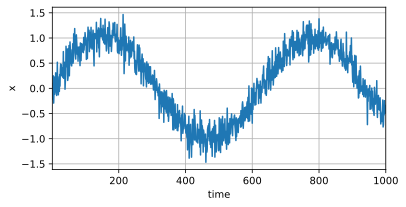

In [14]:
#@tab mxnet, pytorch
T = 1000  # 总共产生1000个点
time = d2l.arange(1, T + 1, dtype=d2l.float32)
x = d2l.sin(0.01 * time) + d2l.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [15]:
tau = 4
features = d2l.zeros((T - tau, tau))

In [16]:
features.shape

torch.Size([996, 4])

In [17]:
x.shape

torch.Size([1000])

In [22]:
x[:10:]

tensor([ 0.0966,  0.0602, -0.2221,  0.2472, -0.2923, -0.0864,  0.2246, -0.1175,
        -0.0083, -0.0194])

In [23]:
for i in range(tau):
    features[:, i] = x[i: T - tau + i]

In [29]:
labels = d2l.reshape(x[tau:], (-1, 1))

In [30]:
labels.shape

torch.Size([996, 1])

In [31]:
# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

In [32]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

In [34]:
batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [35]:
net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.050902
epoch 2, loss: 0.049873
epoch 3, loss: 0.049106
epoch 4, loss: 0.048178
epoch 5, loss: 0.046645


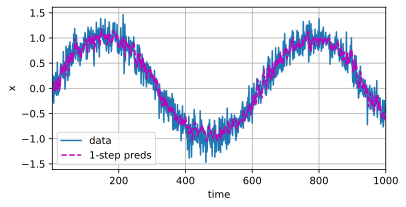

In [36]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]], 
         [d2l.numpy(x), d2l.numpy(onestep_preds)], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000], 
         figsize=(6, 3))

上述实现很简单，即给定4个数据预测下一个数据
改进：
* 难度大一点的是，通过预测出来的新数据和前面的数据结合，再去预测下一个数据，一直预测下去。
* 意义：不仅需要知道明天的股价，还要知道未来一个星期和一个月的股价